## Fréchet mean
Let (M, d) be a complete metric space. Let $x_1, x_2,...,x_n$ be points in $\mathcal{M}$. For any point p in M, the Fréchet variance is $$\Psi(p) = \sum_i^N d^2(p, x_i)$$

The Karcher means are those points, $m$ of $\mathcal{M}$, that locally minimise $\Psi$. $$m = \mathrm{arg\ min}_{p\in\mathcal{M}}\sum_i^N d^2(p, x_i)$$ If there is an $m$ that globally minimises $\Psi$, then it is the Fréchet mean.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from optimiser import *

In [3]:
def frechet_diff(p_eval, points, geometry="spherical"):
    '''
        Calculates the differential to enable a gradient descent algorithm to find 
        the Karcher/Fréchet mean of a set of points.
        Inputs:
            p_eval: Point at which to evaluate the derivative (usually a guess at 
                    the mean). (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            points: List of points which the derivative is calculate w.r.t. to. 
                    (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            geometry: string specifying which metric and distance function to use.
        Outputs:
            Derivative: (d+1)-dimensional vector, expressed in ambient space
                        coordinates.
    '''
    metric = get_metric(p_eval.shape[0], geometry)
    update = np.zeros(p_eval.shape[0])
#   print("frechet_diff: p_eval =", p_eval)
    for xi in points:
#        print("frechet_diff: xi =", xi)
        coeff = 2.*distance(p_eval, xi, geometry)
        if geometry == "spherical":
            coeff /= -np.sqrt(1.-dot(p_eval, xi, geometry)**2)
        elif geometry == "hyperbolic":
            coeff /= np.sqrt(dot(p_eval, xi, geometry)**2-1.)
#        print("frechet_diff: update from xi =", coeff*metric.dot(xi))
        update += coeff*metric.dot(xi)
#        update += coeff*xi
    return update

In [4]:
alpha = 0.1
beta = 1.1
a = np.array([np.cos(alpha), np.sin(alpha)])
b = np.array([np.cos(beta), np.sin(beta)])
p_initial = np.array([np.cos(2.5), np.sin(2.5)])
points = [a,b]
frechet_diff(p_initial, points, geometry="spherical")

array([-8.35955513, -3.24166487])

In [5]:
updated_pts = [p_initial]
steps = []
projections = []
#learning_rates = np.arange(1., )
for i in range(1,10):
    updated_pt, step, projection = gradient_descent(
                             updated_pts[i-1], 
                             points, 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.32,
                             return_vectors=True,
                        )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
 #   print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)
print(steps)
print(projections)

gradient_descent(<class 'numpy.ndarray'>,<class 'list'>,<function frechet_diff at 0x11a4ae620>,spherical,0.32,True,False):
gradient_descent: step = [-8.35955513 -3.24166487]
project_to_tangent: point_on_manifold = [-0.80114362  0.59847214], displacement = [-8.35955513 -3.24166487], geometry = spherical
project_to_tangent: xp_norm = 4.757158094290432, xx_norm = 1.0
gradient_descent: projection on tangent space =  [-4.5483883  -6.08869148]
exponential_map: norm_v_tan =  2.432
gradient_descent(<class 'numpy.ndarray'>,<class 'list'>,<function frechet_diff at 0x11a4ae620>,spherical,0.32,True,False):
gradient_descent: step = [-3.0811007  -2.34276781]
project_to_tangent: point_on_manifold = [0.99768889 0.06794761], displacement = [-3.0811007  -2.34276781], geometry = spherical
project_to_tangent: xp_norm = -3.233165402952802, xx_norm = 1.0
gradient_descent: projection on tangent space =  [ 0.14459251 -2.12308196]
exponential_map: norm_v_tan =  0.68096
gradient_descent(<class 'numpy.ndarray'>,

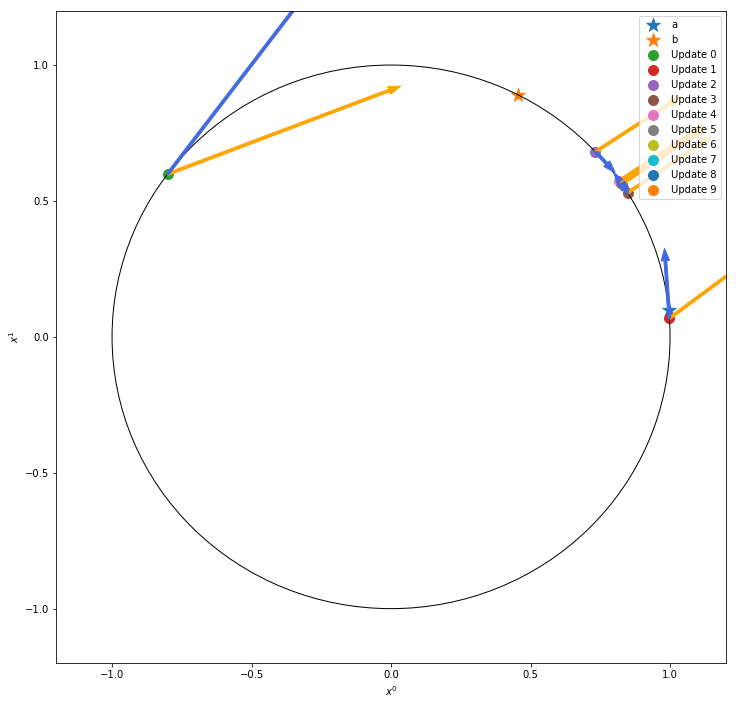

In [6]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, 
                color="orange", label=r"ambient grad")
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=False, 
                color = "royalblue", label=r"tangent-space grad")
ax.legend()

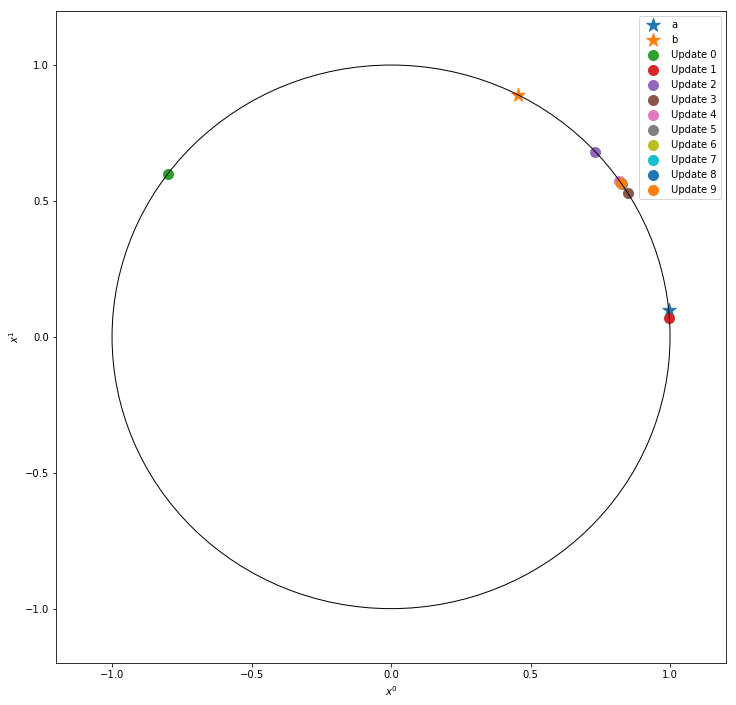

In [7]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

Does it manage to find optimal solution?


In [8]:
mean_angle = 0.5*(alpha+beta)
mean_vec = np.array([np.cos(mean_angle), np.sin(mean_angle)])
proximity = []
for p_i in updated_pts:
    proximity.append(distance(mean_vec, p_i, geometry="spherical"))

    
    

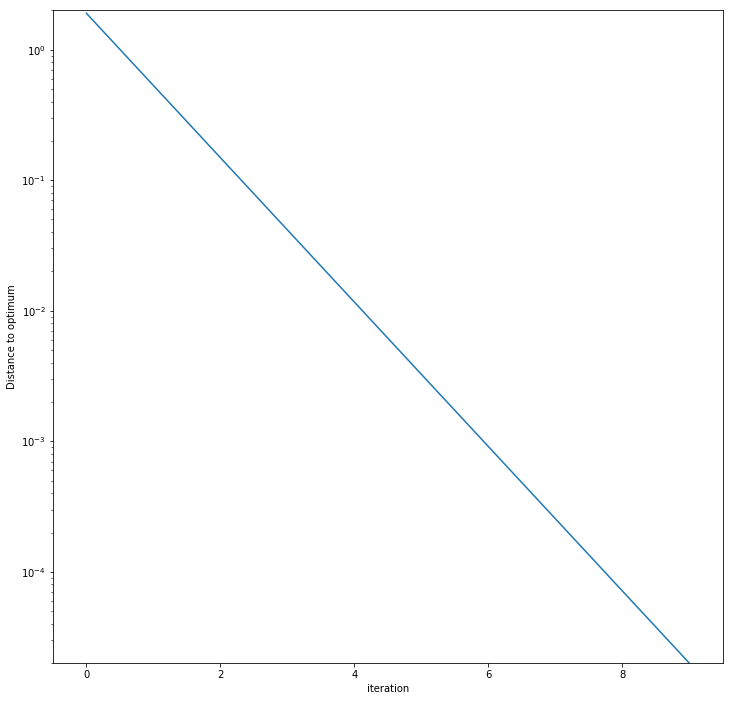

In [9]:
fig = plt.figure(figsize=(12,12))
ymin = np.min(proximity)
ymax = 1.05*np.max(proximity)
#ymax = 20
ax = plt.gca(xlim=[-0.5, len(updated_pts)-0.5], ylim=[ymin, ymax],
             xlabel=r"iteration", ylabel="Distance to optimum")
ax.set_yscale("log")
ax.plot(np.arange(len(updated_pts)), proximity)

Impressively exponential!


Plot step found as function of angle? Magnitude and sign?

In [10]:
a_theta = np.arccos(a[0])
b_theta = np.arccos(b[0])
theta = np.linspace(-np.pi, np.pi, 1000)
x0 = np.cos(theta)
x1 = np.sin(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)
print(x.shape)

(1000, 2)


In [11]:
diff = []
for p_eval in x:
    diff.append(np.linalg.norm(frechet_diff(p_eval, points, geometry="spherical")))
diff = np.array(diff).reshape([len(diff), 1])

In [12]:
print(diff.shape)

(1000, 1)


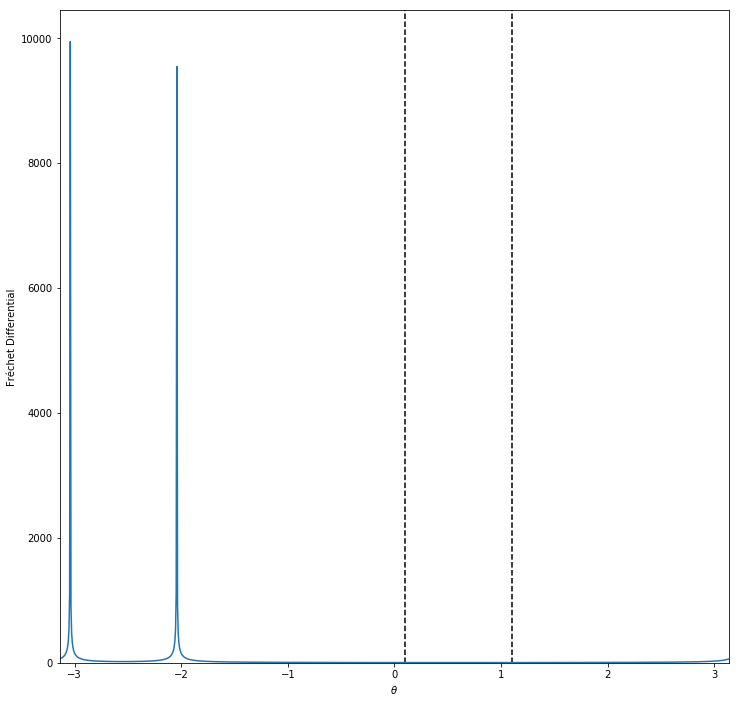

In [13]:
fig = plt.figure(figsize=(12,12))
ymax = 1.05*np.max(diff)
#ymax = 20
ax = plt.gca(xlim=[-np.pi,np.pi], ylim=[0, ymax], xlabel=r"$\theta$", ylabel="Fréchet Differential")
ax.axvline(x=a_theta, color='k', linestyle="--")
ax.axvline(x=b_theta, color='k', linestyle="--")
ax.plot(theta, diff)

When the evaluation point is opposite to one of the points in the cloud, $$d(p, x_i) = cos^{-1}(\pi) = -1$$ then the derivative goes infinite, because the $1-\left<p, x_i\right>^2$ term goes to zero in the denominator but the distance in the numerator does not.


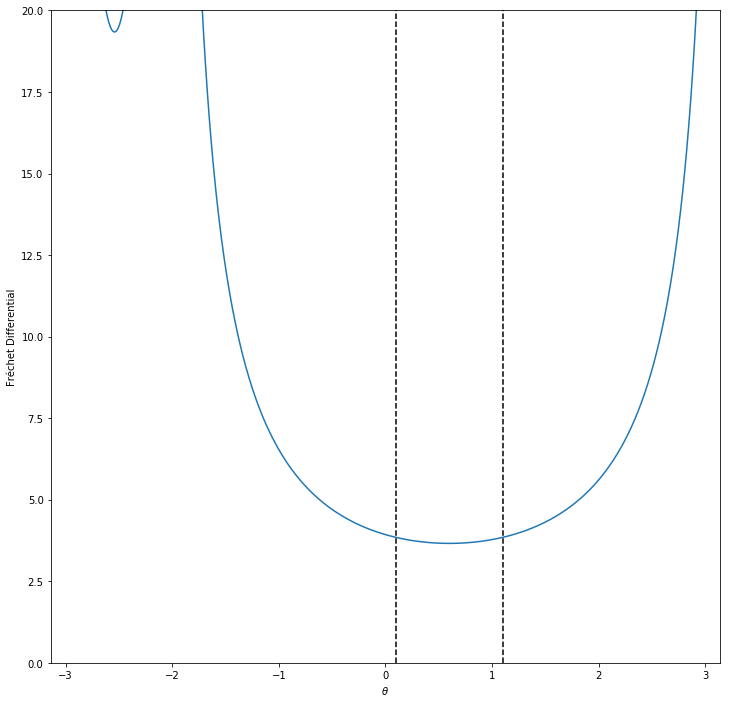

In [14]:
fig = plt.figure(figsize=(12,12))
#ymax = 1.05*np.max(diff)
ymax = 20
ax = plt.gca(xlim=[-np.pi,np.pi], ylim=[0, ymax], xlabel=r"$\theta$", ylabel="Fréchet Differential")
ax.axvline(x=a_theta, color='k', linestyle="--")
ax.axvline(x=b_theta, color='k', linestyle="--")
ax.plot(theta, diff)

## Hyperboloid

How do things behave with the hyperboloid?

In [15]:
theta = np.linspace(-5, 5, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)

In [31]:
def frechet_diff2(p_eval, points, geometry="spherical"):
    '''
        Calculates the differential to enable a gradient descent algorithm to find 
        the Karcher/Fréchet mean of a set of points.
        Inputs:
            p_eval: Point at which to evaluate the derivative (usually a guess at 
                    the mean). (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            points: List of points which the derivative is calculate w.r.t. to. 
                    (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            geometry: string specifying which metric and distance function to use.
        Outputs:
            Derivative: (d+1)-dimensional vector, expressed in ambient space
                        coordinates.
    '''
    metric = get_metric(p_eval.shape[0], geometry)
    update = np.zeros(p_eval.shape[0])
    print("frechet_diff: p_eval =", p_eval)
    for xi in points:
        print("frechet_diff: xi =", xi)
        coeff = -2.*distance(p_eval, xi, geometry)
        if geometry == "spherical":
            coeff /= np.sqrt(1.-dot(p_eval, xi, geometry)**2)
        elif geometry == "hyperbolic":
            coeff /= np.sqrt(dot(p_eval, xi, geometry)**2-1.)
        print("frechet_diff: update from xi =", coeff*metric.dot(xi))
#        update += coeff*metric.dot(xi)
        update += coeff*xi
    return update

In [32]:
alpha = 0.1
beta = 1.1
a = np.array([np.sinh(alpha), np.cosh(alpha)])
b = np.array([np.sinh(beta), np.cosh(beta)])
p_initial = np.array([np.sinh(2.5), np.cosh(2.5)])
points = [a,b]
frechet_diff2(p_initial, points, geometry="hyperbolic")

frechet_diff: p_eval = [6.05020448 6.13228948]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.08795833  0.8825133 ]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-1.96387647  2.45331527]


array([-2.0518348 , -3.33582857])

In [40]:
updated_pts = [p_initial]
steps = []
projections = []
#learning_rates = np.arange(1., )
for i in range(1,10):
    updated_pt, step, projection = gradient_descent(
                             updated_pts[i-1], 
                             points, 
                             frechet_diff2, 
                             geometry="hyperbolic", 
                             learning_rate=0.32,
                             return_vectors=True,
                        )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
print("updated_pts = ", updated_pts)
print("steps = ", steps)
print("projections = ", projections)

gradient_descent(<class 'numpy.ndarray'>,<class 'list'>,<function frechet_diff2 at 0x11c670e18>,hyperbolic,0.32,True,False):
frechet_diff: p_eval = [6.05020448 6.13228948]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.08795833  0.8825133 ]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-1.96387647  2.45331527]
gradient_descent: step = [-2.0518348  -3.33582857]
project_to_tangent: point_on_manifold = [6.05020448 6.13228948], displacement = [-2.0518348  -3.33582857], geometry = hyperbolic
project_to_tangent: xp_norm = 8.042246340978524, xx_norm = -1.0
gradient_descent: projection on tangent space =  [46.60540005 45.98155406]
exponential_map: norm_v_tan =  2.432000000000018
gradient_descent(<class 'numpy.ndarray'>,<class 'list'>,<function frechet_diff2 at 0x11c670e18>,hyperbolic,0.32,True,False):
frechet_diff: p_eval = [0.06805242 1.00231289]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.20029931  

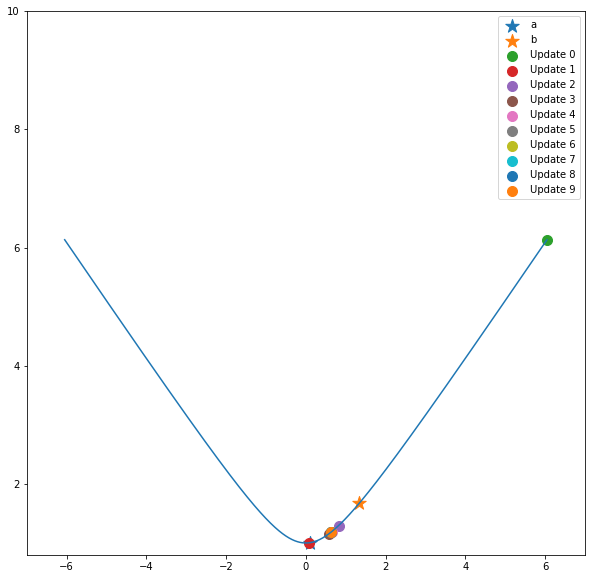

In [34]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca(xlim=[-7, 7], ylim=[0.8,10.])
plt.plot(x0, x1)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )

ax.legend()

In [35]:
for pt in updated_pts:
    print(dot(pt, pt, geometry="hyperbolic"))

-0.9999999999999929
-1.0000000000004738
-0.9999999999988357
-1.000000000002116
-0.9999999999962467
-1.000000000006644
-0.9999999999882415
-1.0000000000208107
-0.9999999999631677
-1.0000000000651887


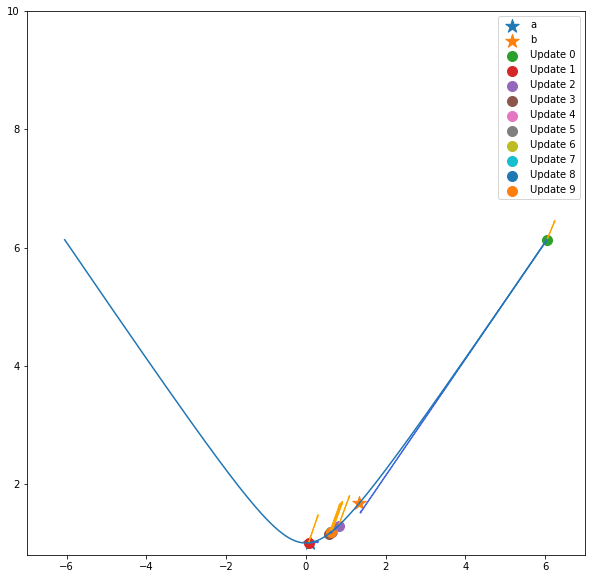

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca(xlim=[-7, 7], ylim=[0.8,10.])
plt.plot(x0, x1)
ax.scatter(points[0][0], points[0][1], marker='*',s=200,label = "a")
ax.scatter(points[1][0], points[1][1], marker='*',s=200,label = "b")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, 
                color="orange", label=r"ambient grad")
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=False, 
                color = "royalblue", label=r"tangent-space grad")
ax.legend()

In [37]:
a_theta = np.arccosh(a[1])
b_theta = np.arccosh(b[1])
theta = np.linspace(-2.5, 2.5, 1000)
x0 = np.sinh(theta)
x1 = np.cosh(theta)
x = np.array([np.array([x0i, x1i]) for x0i, x1i in zip(x0, x1)])
#print(x)
print(x.shape)

(1000, 2)


In [38]:
diff = []
for p_eval in x:
    differential = frechet_diff2(p_eval, points, geometry="hyperbolic")
    diff.append(dot(differential, differential, geometry="hyperbolic"))
diff = np.array(diff).reshape([len(diff), 1])

frechet_diff: p_eval = [-6.05020448  6.13228948]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.07780253  0.78061698]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-0.52591864  0.65698848]
frechet_diff: p_eval = [-6.01958799  6.10208486]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.07804674  0.78306724]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-0.52782659  0.65937193]
frechet_diff: p_eval = [-5.9891223   6.07203309]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.07829147  0.78552271]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-0.52974047  0.6617628 ]
frechet_diff: p_eval = [-5.95880663  6.04213343]
frechet_diff: xi = [0.10016675 1.00500417]
frechet_diff: update from xi = [-0.07853672  0.78798338]
frechet_diff: xi = [1.33564747 1.66851855]
frechet_diff: update from xi = [-0.5316603   0.66416109]
frec

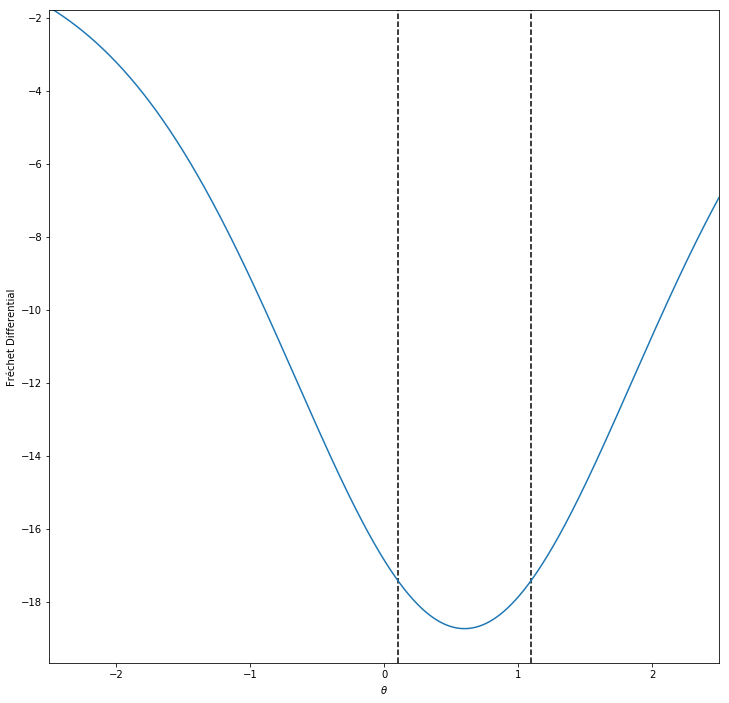

In [39]:
fig = plt.figure(figsize=(12,12))
ymin = 1.05*np.min(diff)
ymax = 1.05*np.max(diff)
#ymax = 20
ax = plt.gca(xlim=[-2.5,2.5], ylim=[ymin, ymax], xlabel=r"$\theta$", ylabel="Fréchet Differential")
ax.axvline(x=a_theta, color='k', linestyle="--")
ax.axvline(x=b_theta, color='k', linestyle="--")
ax.plot(theta, diff)

### Vectorize Fréchet derivative finding...

In [58]:
def frechet_diff_vectorised(p_eval, points, geometry="spherical"):
    '''
        Calculates the differential to enable a gradient descent algorithm to find 
        the Karcher/Fréchet mean of a set of points.
        Inputs:
            p_eval: Point at which to evaluate the derivative (usually a guess at 
                    the mean). (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            points: List of points which the derivative is calculate w.r.t. to. 
                    (d+1)-dimensional vector, expressed in ambient space
                    coordinates.
            geometry: string specifying which metric and distance function to use.
        Outputs:
            Derivative: (d+1)-dimensional vector, expressed in ambient space
                        coordinates.
        Note: should vectorise to remove loop over points.
    '''
#    metric = get_metric(p_eval.shape[0], geometry)
    update = np.zeros(p_eval.shape[0])
    
    print("frechet_diff_vectorised: p_eval =", p_eval)
    print("frechet_diff_vectorised: points =", points)
    coeff = -2.*distance(p_eval, points, geometry)
    print("frechet_diff_vectorised: coeff = ", coeff)
#    for xi in points:
#        print("frechet_diff: xi =", xi)
##        coeff = -2.*distance(p_eval, xi, geometry)
#        if geometry == "spherical":
#            coeff /= np.sqrt(1.-dot(p_eval, xi, geometry)**2)
#        elif geometry == "hyperbolic":
#            coeff /= np.sqrt(dot(p_eval, xi, geometry)**2-1.)
#        print("frechet_diff: update from xi =", coeff*xi)
#        update += coeff*xi
    return update

In [59]:
alpha = 0.1
beta = 1.1
a = np.array([np.sinh(alpha), np.cosh(alpha)])
b = np.array([np.sinh(beta), np.cosh(beta)])
p_initial = np.array([np.sinh(2.5), np.cosh(2.5)])
points = [a,b]
print("points to mean = ", points)
print("initial guess = ", p_initial)
#frechet_diff2(p_initial, points, geometry="hyperbolic")
frechet_diff_vectorised(p_initial, points, geometry="hyperbolic")

points to mean =  [array([0.10016675, 1.00500417]), array([1.33564747, 1.66851855])]
initial guess =  [6.05020448 6.13228948]
frechet_diff_vectorised: p_eval = [6.05020448 6.13228948]
frechet_diff_vectorised: points = [array([0.10016675, 1.00500417]), array([1.33564747, 1.66851855])]
frechet_diff_vectorised: coeff =  [-5.42977127 -4.20350014]


array([0., 0.])

In [57]:
np.arccosh(-dot(b, p_initial, geometry="hyperbolic"))

1.399999999999999